Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

Data Preprocessing

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

In [10]:
#Read the data
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


No Null value

In [12]:
#check for missing values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [13]:
data1=data.rename({'R&D Spend':'R_DS','Administration':'ADM','Marketing Spend':'MKTS'},axis=1)
data1

,R_DS,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [14]:
#chek for dupilcate entries.... No duplicates in given dataset
data1[data1.duplicated()]

,R_DS,ADM,MKTS,State,Profit


In [15]:
data1.describe()

,R_DS,ADM,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation Analysis

In [16]:
c=data1.corr()
c

,R_DS,ADM,MKTS,Profit
R_DS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Research and development and profit has strong correlation

# EDA

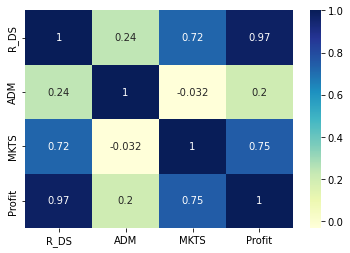

In [17]:
#heatmap
sns.heatmap(c,annot=True,cmap='YlGnBu')
plt.show()

The heatmap of correlation also demonstrates similar insights i.e. direct relationship with profit

# Outlier Detection

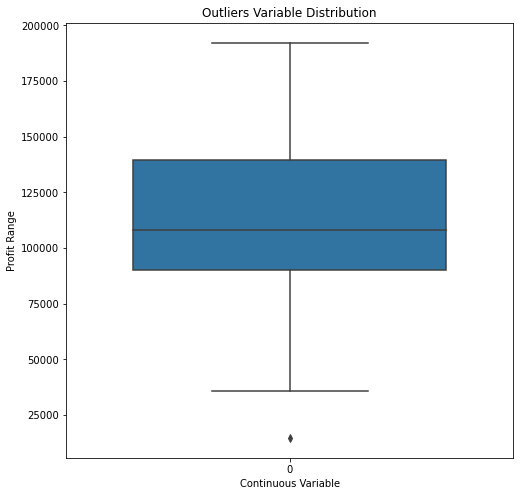

In [18]:
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data1['Profit'], orient="v", width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

While looking at the boxplot we can see the outliers in the profit(target variable)

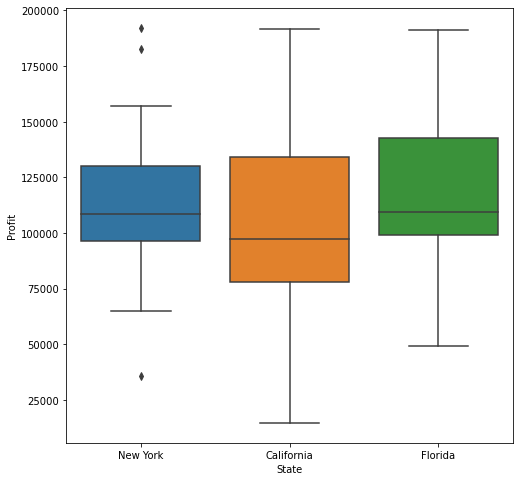

In [19]:
#State wise outliers detection
sns.boxplot(x = 'State', y = 'Profit', data = data1)
plt.show()

Above box plot shows outlier in New York. Also California state have greater range in both maximum and minimum profit

In [ ]:
# Histgram 

C:\Users\Anuja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


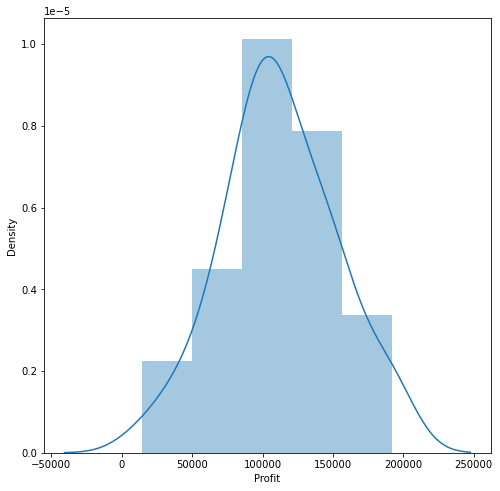

In [20]:
#Profit
sns.distplot(data1['Profit'],bins=5,kde=True)
plt.show()

The average profit (which is 100000) is the most frequent i.e. it's more likely to be in distribution plot

# Pair Plot

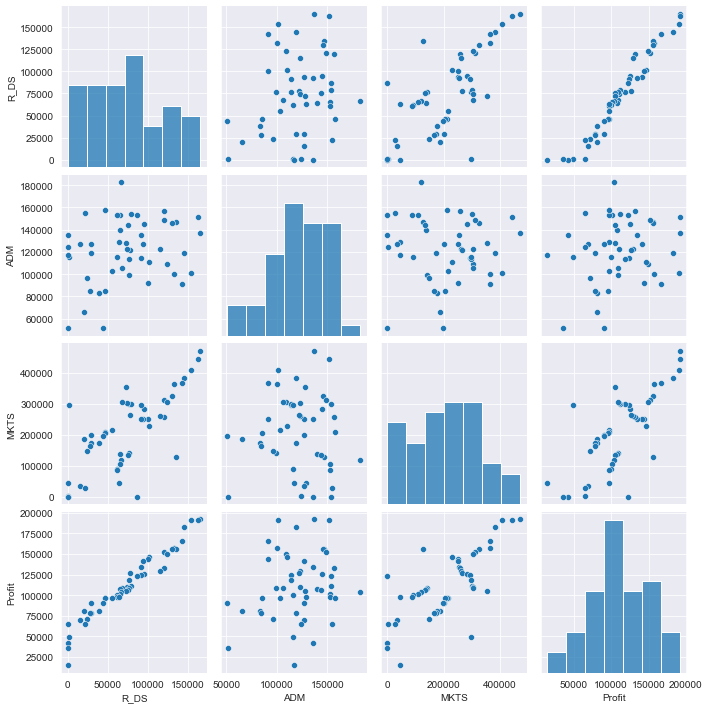

In [21]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

As we can see in the pairpot, 
1.More you invest in Research and Development the greater will be your profit.
2.The marketing spend seems to be directly proportional (though little bit outliers are there) with the profit.
3.The administration spend seems to have no relation with the profit.

# Preparing a Model

In [11]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_DS+ADM+MKTS',data=data1).fit()

In [12]:
#summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           4.53e-30
Time:                        14:00:12   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_DS           0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Coefficients
model.params

Intercept    50122.192990
R_DS             0.805715
ADM             -0.026816
MKTS             0.027228
dtype: float64

In [14]:
#t and p-Values
print(model.tvalues, '\n',np.round(model.pvalues,5))

Intercept     7.626218
R_DS         17.846374
ADM          -0.525507
MKTS          1.655077
dtype: float64 
 Intercept    0.00000
R_DS         0.00000
ADM          0.60176
MKTS         0.10472
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear regression Models

In [16]:
# Build SLR variables 'ADMS' and 'MKTS'  for which pvalue is not less than 0.05
ml_ADM=smf.ols("Profit~ADM",data=data1).fit()
#t and p-Values
print(ml_ADM.tvalues, '\n', ml_ADM.pvalues)  

Intercept    3.040044
ADM          1.419493
dtype: float64 
 Intercept    0.003824
ADM          0.162217
dtype: float64


#Pvalue for ADM is not significant

In [17]:
ml_ADM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 24 Feb 2022   Prob (F-statistic):              0.162
Time:                        14:00:29   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Pvalue for ADM is not significant as it is not less than 0.05

In [18]:
ml_MKTS=smf.ols("Profit~MKTS",data=data1).fit()
#t and p-Values
print(ml_MKTS.tvalues, '\n', ml_MKTS.pvalues) 

Intercept    7.808356
MKTS         7.802657
dtype: float64 
 Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64


#Pvalue for MKTS is significant as it is less than 0.05

In [19]:
ml_MKTS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           4.38e-10
Time:                        14:00:37   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKTS           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
ml_ADM_MKTS=smf.ols("Profit~ADM+MKTS",data=data1).fit()
#t and p-Values
print(ml_ADM_MKTS.tvalues, '\n', ml_ADM_MKTS.pvalues) 

Intercept    1.142741
ADM          2.467779
MKTS         8.281039
dtype: float64 
 Intercept    2.589341e-01
ADM          1.729198e-02
MKTS         9.727245e-11
dtype: float64


In [ ]:
#In ADM+MKTS model p value is less than 0.05. So it is significant

In [21]:
ml_ADM_MKTS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           2.50e-10
Time:                        14:00:43   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MKTS           0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [ ]:
#  Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

In [22]:
rsq_r_ds=smf.ols("R_DS~ADM+MKTS",data=data1).fit().rsquared
vif_r_ds=1/(1-rsq_r_ds)

rsq_adm=smf.ols("ADM~R_DS+MKTS",data=data1).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_mkts=smf.ols("MKTS~R_DS+ADM",data=data1).fit().rsquared
vif_mkts=1/(1-rsq_mkts)

# Putting the values in Dataframe format
d1={'Variables':['R_DS','ADM','MKTS'],'Vif':[vif_r_ds,vif_adm,vif_mkts]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,Vif
0,R_DS,2.468903
1,ADM,1.175091
2,MKTS,2.326773


#None of abobe variable has VIF>20, No Collinearity,
so consider all varaibles in Regression equation

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


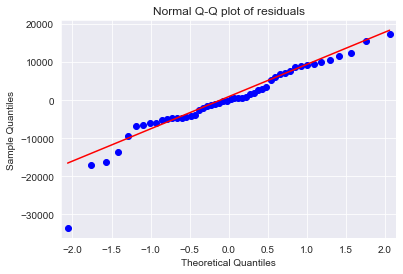

In [23]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [24]:
res=model.resid
res

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [25]:
res.mean() #Mean of error is not zero

7.625203579664231e-11

In [26]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

# Residual Plot for Homoscedasticity

In [27]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

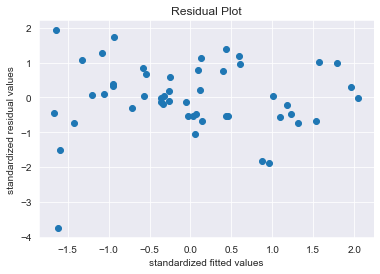

In [28]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

# Residual Vs Regressors

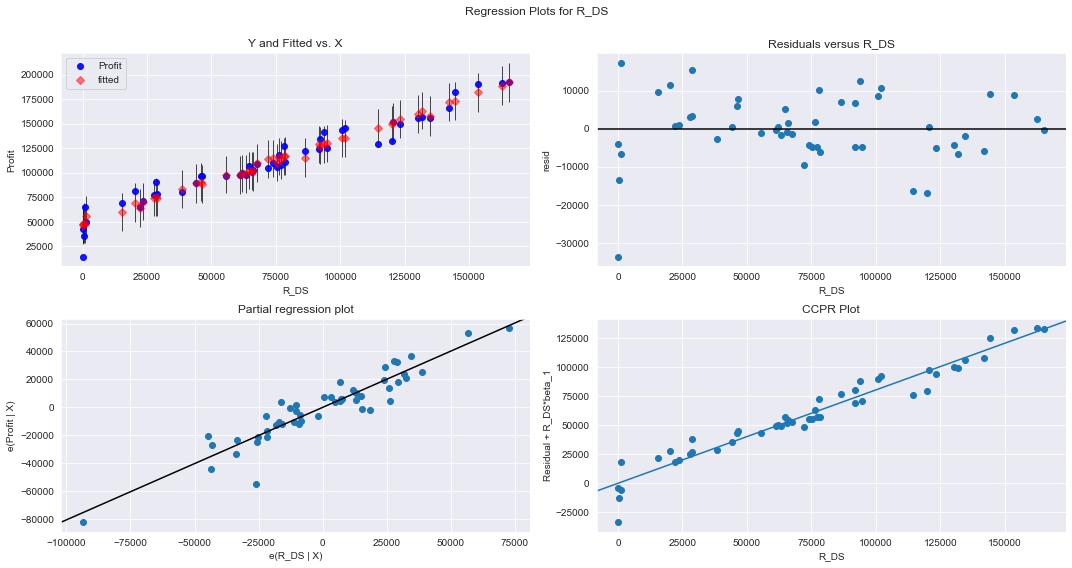

In [29]:
# Test for Residuals Vs Regressors or independent 'x' variables or predictors 
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'R_DS',fig=fig)
plt.show()

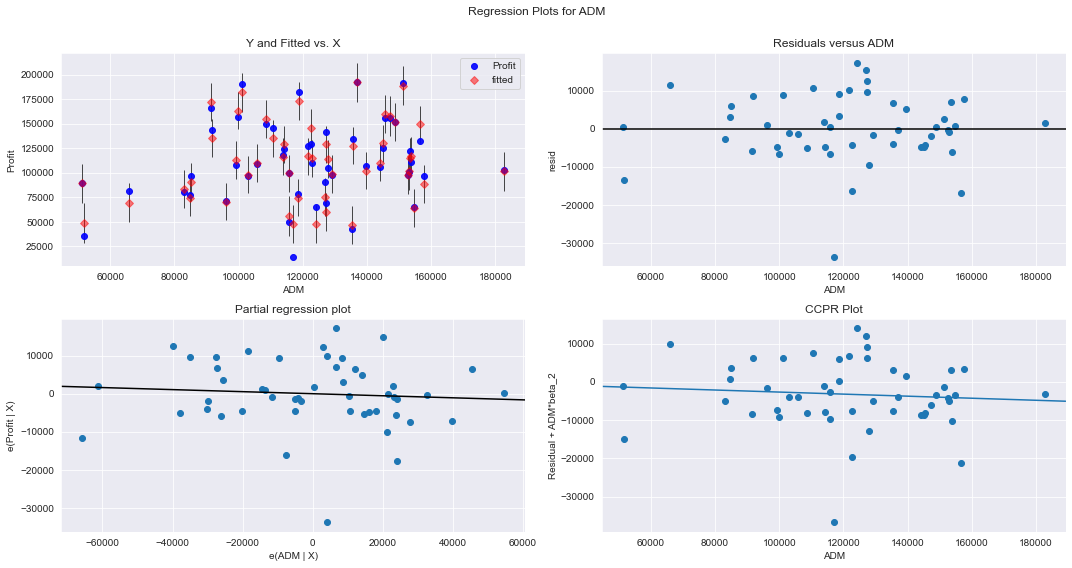

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADM',fig=fig)
plt.show()

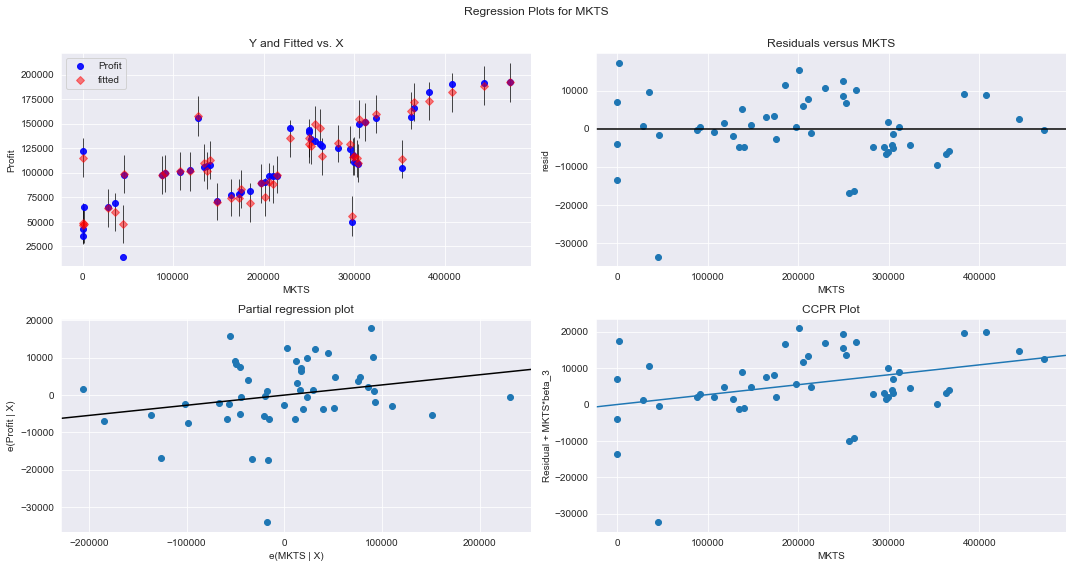

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [32]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

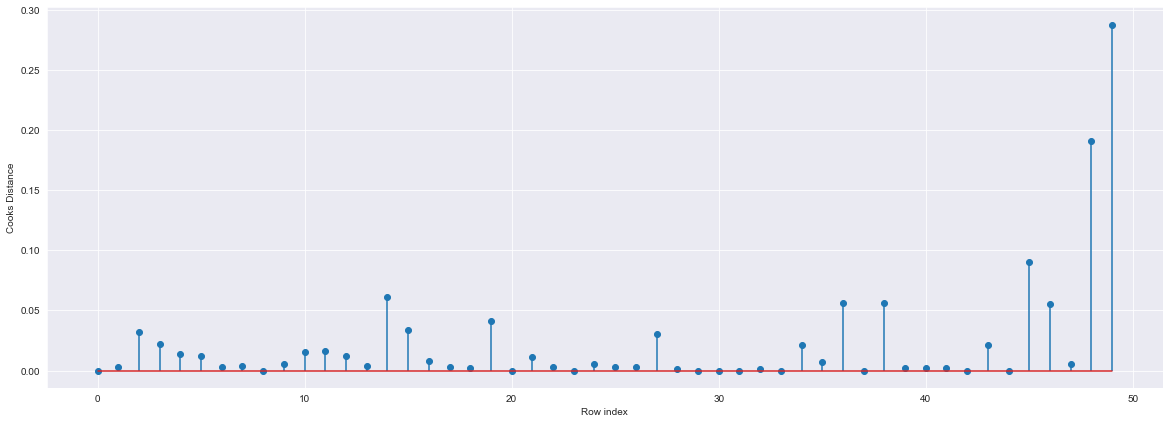

In [33]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#index and value of influencer where c is more than .25
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# High Influence points

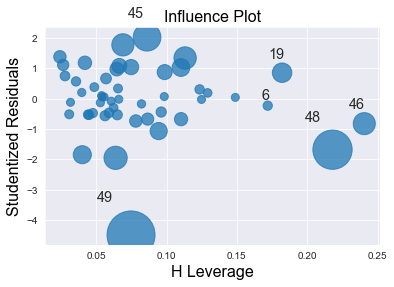

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [36]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of columns & n = no. of rows
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [37]:
data1[data1.index.isin([49])] 

,R_DS,ADM,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [39]:
#See the differences in R_DS and other variable values
data1.head()

,R_DS,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [44]:
data1[data1.index.isin([47, 49])]

,R_DS,ADM,MKTS,State,Profit
47,0.0,135426.92,0.00,California,42559.73
49,0.0,116983.80,45173.06,California,14681.40


# Improving the model

In [40]:
data1_new=data1.copy()

In [41]:
data1_new.head()

,R_DS,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [42]:
data1_new

,R_DS,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [43]:
# Drop the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1_new.drop(data1_new.index[[49]],axis=0).reset_index(drop=True)
data2

,R_DS,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Final  Model

In [47]:
model2 = smf.ols('Profit~R_DS+ADM+MKTS',data=data2).fit()

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           8.85e-32
Time:                        14:27:15   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
R_DS           0.7830      0.038     20.470      0.000       0.706       0.860
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#check R-Squared and AIC values
(model2.rsquared,model2.aic)


(0.9613162435129847, 1020.5652974526367)

In [50]:
#check R-Squared and AIC values
(model.rsquared,model.aic)

(0.9507459940683246, 1058.7714985998055)

Comparing above R-Square and AIC values, model 'model2' has high R- square and low AIC value.
Here we found heteroscadacity problem due to record no.49 where outlier is found. 

#  COOK's distance on model2

In [56]:
model_influence_2 = model2.get_influence()
(c_2, _) = model_influence_2.cooks_distance

In [57]:
c_2

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

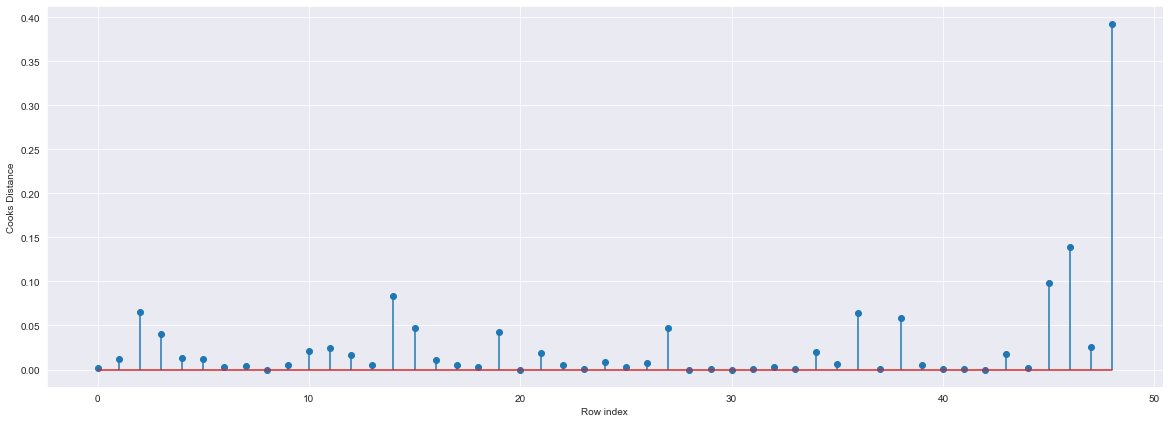

In [59]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c_2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
#index of the data points where c is more than .36
(np.argmax(c_2),np.max(c_2))

(48, 0.39274420556321554)

In [61]:
# Drop the data points which are influencers and reassign the row number (reset_index(drop=True))
data3=data2.drop(data2.index[[48]],axis=0).reset_index(drop=True)
data3

,R_DS,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [62]:
#Build model3
model3 = smf.ols('Profit~R_DS+ADM+MKTS',data=data3).fit()

In [63]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           2.03e-31
Time:                        15:16:36   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
R_DS           0.7895      0.036     21.718      0.000       0.716       0.863
ADM           -0.0633      0.044     -1.442      0.156      -0.152       0.025
MKTS           0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
#check R-Squared and AIC values
(model3.rsquared,model3.aic)

(0.9626766170294073, 994.6690439260116)

In [65]:
#Again check for influencers
model_influence_3 = model3.get_influence()
(c_3, _) = model_influence_3.cooks_distance

In [66]:
c_3

array([0.0094125 , 0.03599295, 0.07038599, 0.04910179, 0.02027973,
       0.01581269, 0.00508904, 0.00203414, 0.00139645, 0.00741048,
       0.02122911, 0.02036064, 0.01761793, 0.0065972 , 0.08739921,
       0.05356297, 0.01189486, 0.00394455, 0.00383202, 0.03474835,
       0.00036025, 0.01334921, 0.00501967, 0.00125401, 0.02328487,
       0.00260973, 0.00828195, 0.0439174 , 0.00219589, 0.00131071,
       0.00179249, 0.00104067, 0.00938565, 0.00186774, 0.03319456,
       0.00319554, 0.07149117, 0.02037088, 0.04383268, 0.01633989,
       0.0002867 , 0.0002371 , 0.00246905, 0.01432865, 0.00257352,
       0.0951408 , 0.13829134, 0.03936831])

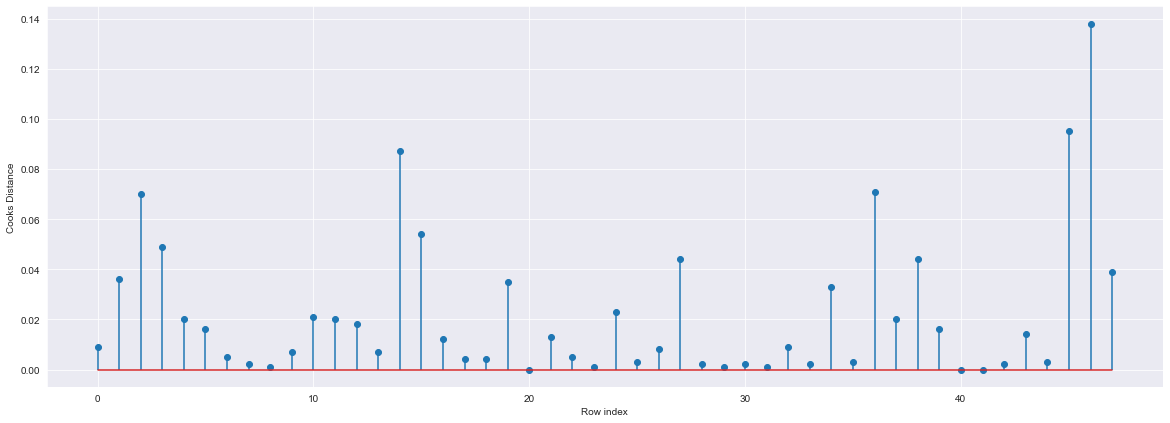

In [67]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(c_3, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [68]:
(np.argmax(c_2),np.max(c_2))

(48, 0.39274420556321554)

In [ ]:
#Since the value is <1 , we can stop the diagnostic process and finalize the model

In [69]:
#Check the accuracy of the mode
model3 = smf.ols('Profit~R_DS+ADM+MKTS',data=data3).fit()

In [70]:
#check R-Squared and AIC values
(model3.rsquared,model3.aic)

(0.9626766170294073, 994.6690439260116)

In [71]:
data3

,R_DS,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Predicting for new data

In [72]:
#New data for prediction is
new_data=pd.DataFrame({'R_DS':70000,"ADM":90000,"MKTS":140000},index=[0])
new_data

,R_DS,ADM,MKTS
0,70000,90000,140000


In [74]:
model3.predict(new_data)

0    111027.02823
dtype: float64

In [76]:
pred_y=model3.predict(data3)

In [77]:
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64